In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
#Genrators - Entire data is divided into batches ,
#for example - If you have 10,000 images instead sending entire data/images send in the form of batches.

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
    )


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
    )




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
#create a CNN model

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.2230 - accuracy: 0.5938 - val_loss: 0.7204 - val_accuracy: 0.5766
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5523 - accuracy: 0.7186 - val_loss: 0.8145 - val_accuracy: 0.7088
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4711 - accuracy: 0.7782 - val_loss: 0.5152 - val_accuracy: 0.7780
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4027 - accuracy: 0.8158 - val_loss: 0.4862 - val_accuracy: 0.7758
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3591 - accuracy: 0.8424 - val_loss: 0.6371 - val_accuracy: 0.6938
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2990 - accuracy: 0.8732 - val_loss: 0.5032 - val_accuracy: 0.8016
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2211 - accuracy: 0.9096 - val_loss: 0.5410 - val_ac

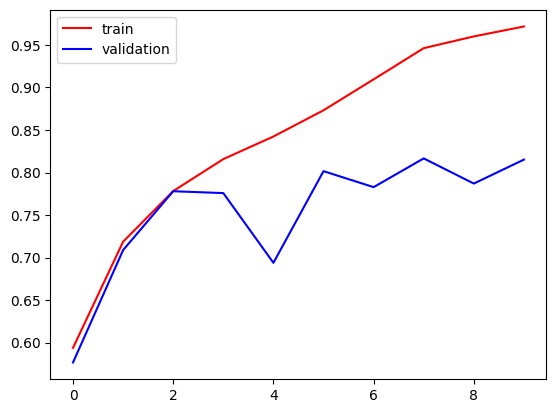

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

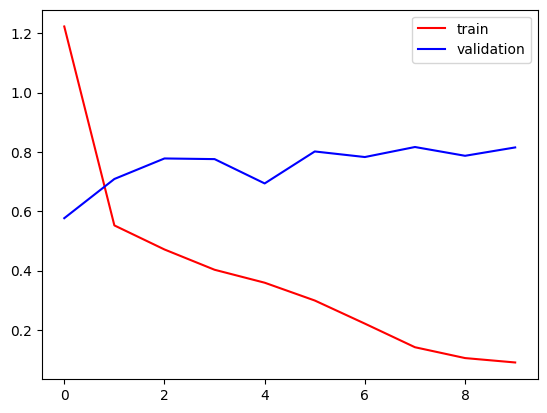

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
#way to reduce overfitting

#Add more data
#Data Augumentation - using Existing Data Create more Data
#L1/L2 Regularizer\
#Dropout
#Batch Norm
#Reduce Complexity

In [23]:
import cv2

In [51]:
test_img = cv2.imread('/content/Cat.jpg')

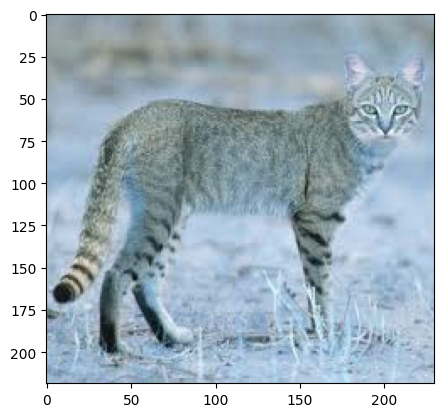

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(219, 230, 3)

In [54]:
test_img = cv2.resize(test_img,(256,256))

In [55]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [57]:
test_img = cv2.imread('/content/Dog.jpg')

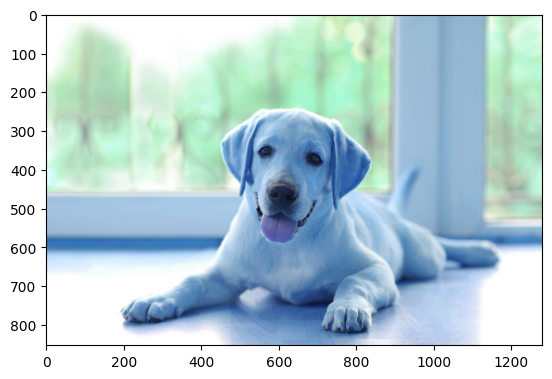

In [58]:
plt.imshow(test_img)

In [59]:
test_img.shape

(853, 1280, 3)

In [60]:
test_img = cv2.resize(test_img,(256,256))

In [61]:
test_input = test_img.reshape((1,256,256,3))

In [62]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)